In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

columns = open('dataset/flag.fieldfile').read().strip().splitlines()
df = pd.read_csv('dataset/flag.data', header=None, names=columns)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Definiranje kontinuiranih i kategorickih varijabli

In [31]:
kontinuiraneVarijable = [
    "area", "population", "bars", "stripes", "colours",
    "circles", "crosses", "saltires", "quarters", "sunstars"
]

kategorickeVarijable = [
    "landmass", "zone", "language", "religion",
    "red", "green", "blue", "gold", "white",
    "black", "orange", "mainhue", "crescent", "triangle",
    "icon", "animate", "text", "topleft", "botright"
]

# 1. Kontrola kvalitete podataka
- Prepoznavanje nedostajućih vrijedn­osti
- Rekodiranje nedostajućih vrijednosti  npr  .null. -> „missing“

In [32]:
df[kontinuiraneVarijable] = df[kontinuiraneVarijable].fillna(-1)
df[kategorickeVarijable] = df[kategorickeVarijable].fillna("empty")

print(f'Missing values per column:\n{df.isnull().sum()}')

Missing values per column:
name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64


- Prepoznavanje uniformnih ili nelogičnih distribucija

In [33]:
# Deskriptivna statistika za kontinuirane varijable
df[kontinuiraneVarijable].describe()


,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


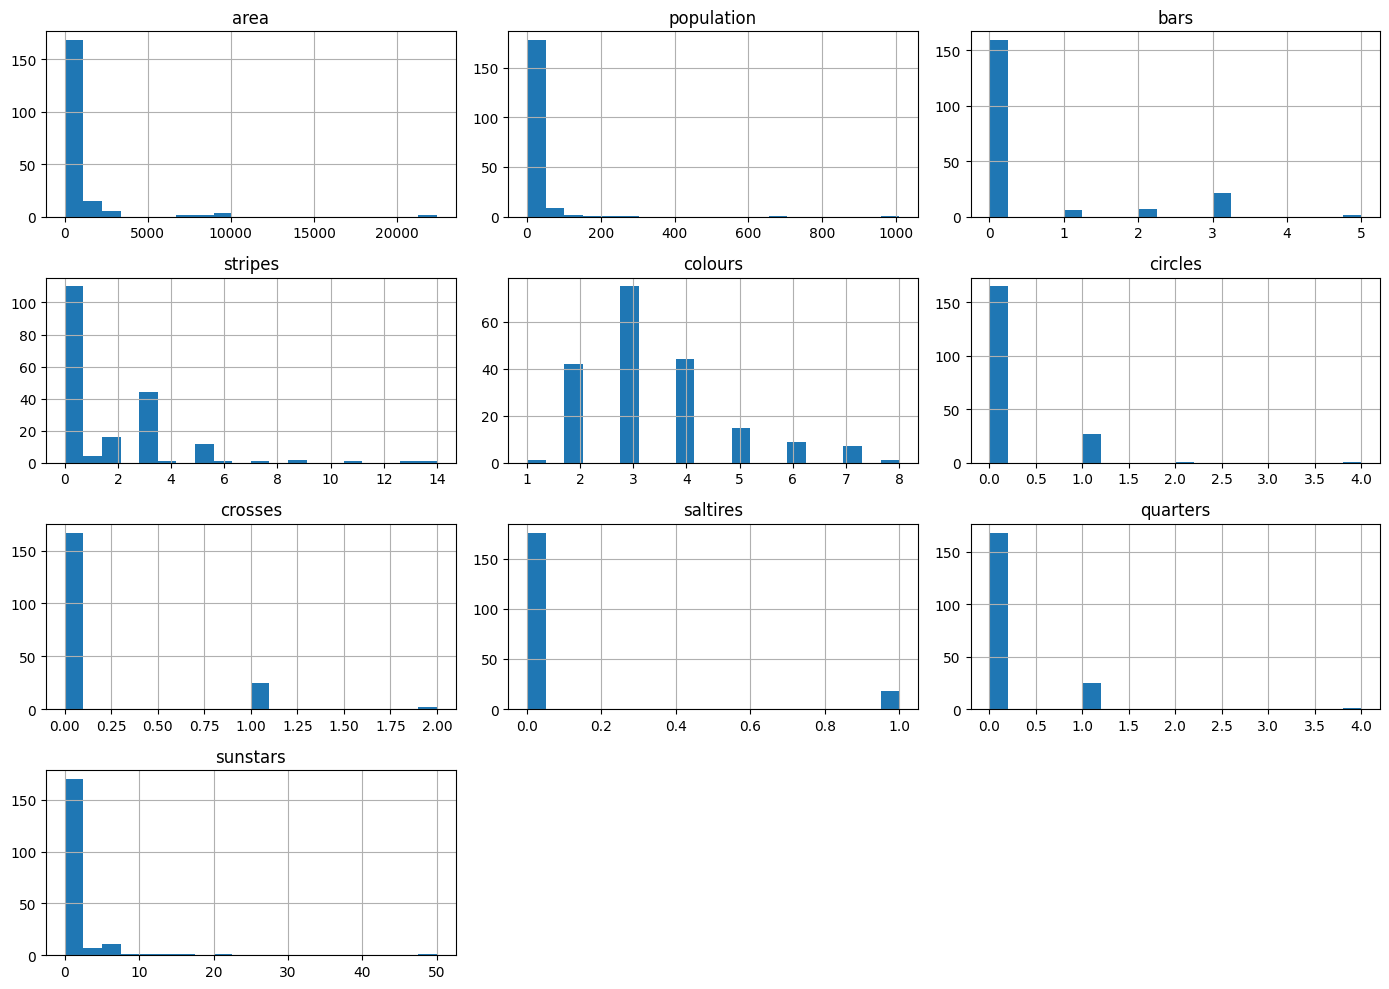

In [34]:
# Histogrami za kontinuirane varijable
df[kontinuiraneVarijable].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()



landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64



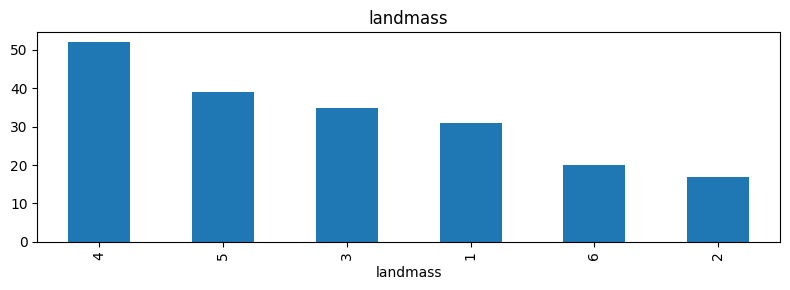


zone
1    91
4    58
2    29
3    16
Name: count, dtype: int64



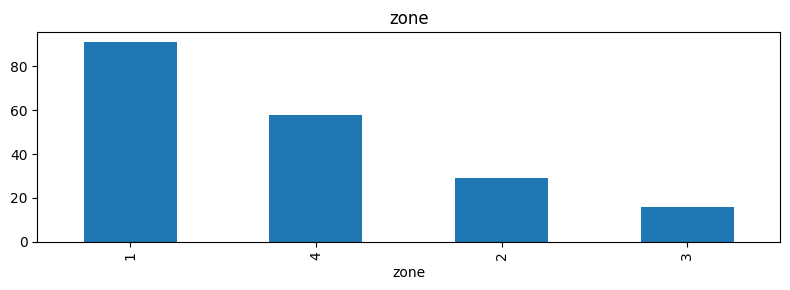


language
10    46
1     43
6     30
2     21
8     19
3     17
4      6
5      4
7      4
9      4
Name: count, dtype: int64



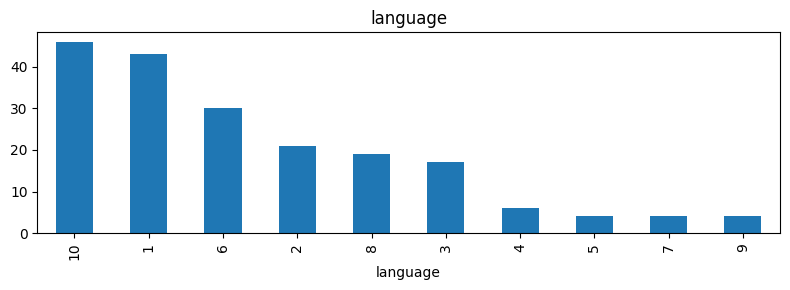


religion
1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: count, dtype: int64



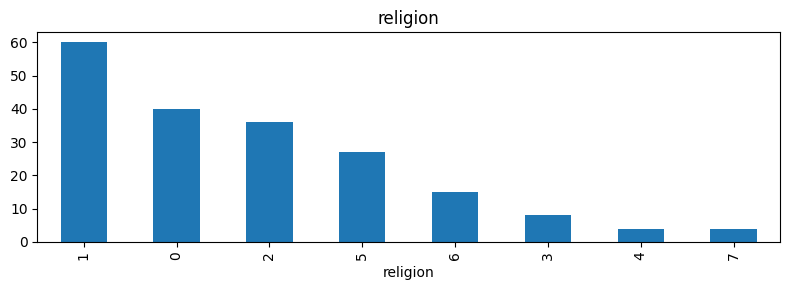


red
1    153
0     41
Name: count, dtype: int64



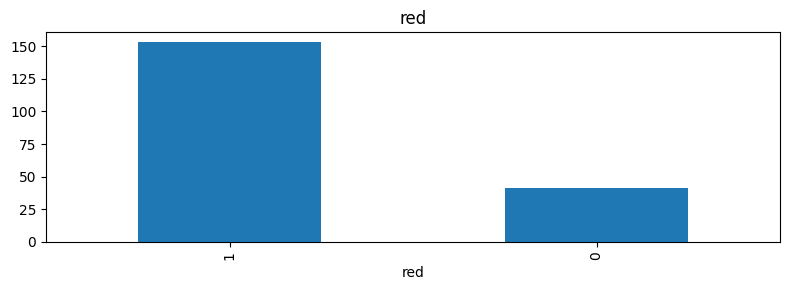


green
0    103
1     91
Name: count, dtype: int64



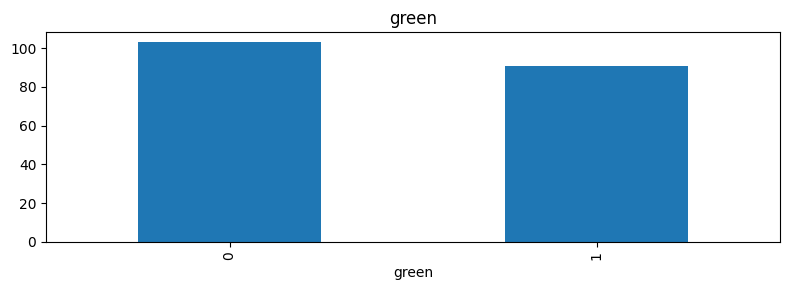


blue
1    99
0    95
Name: count, dtype: int64



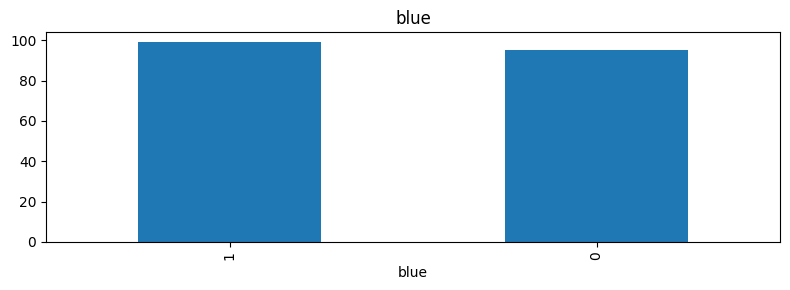


gold
0    103
1     91
Name: count, dtype: int64



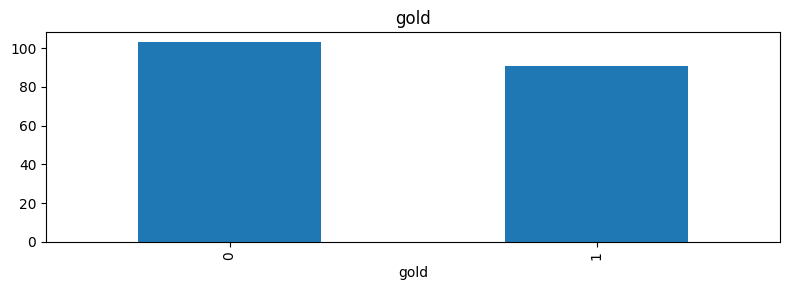


white
1    146
0     48
Name: count, dtype: int64



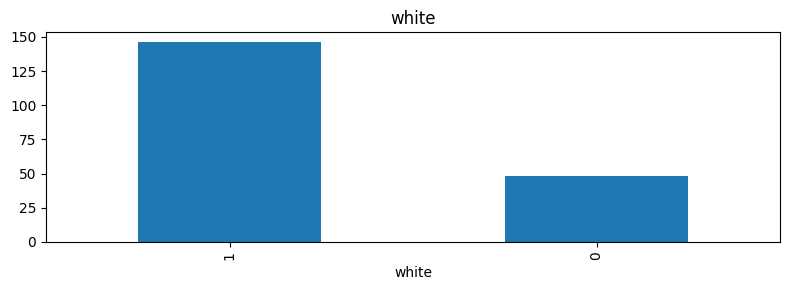


black
0    142
1     52
Name: count, dtype: int64



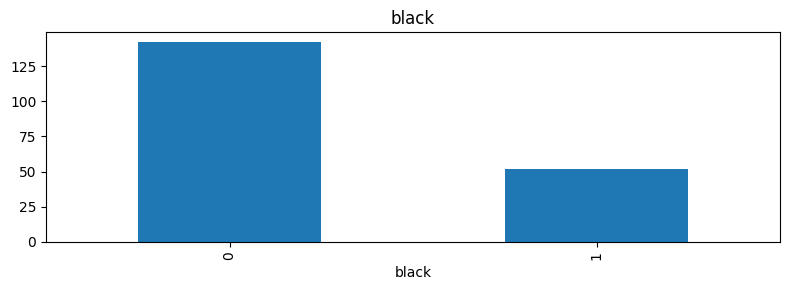


orange
0    168
1     26
Name: count, dtype: int64



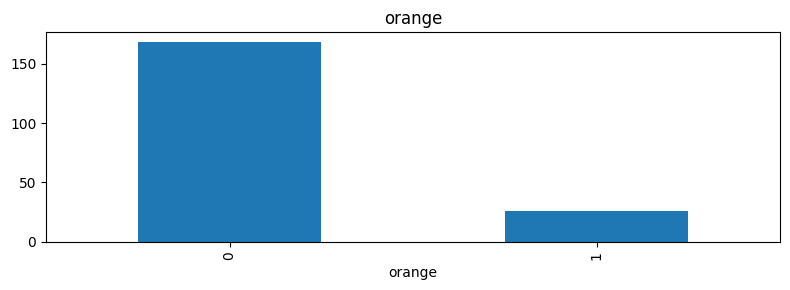


mainhue
red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: count, dtype: int64



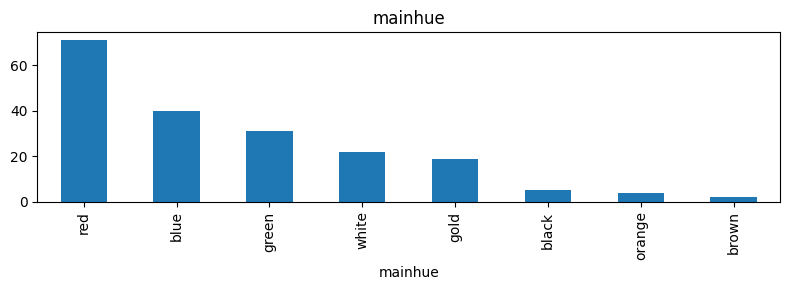


crescent
0    183
1     11
Name: count, dtype: int64



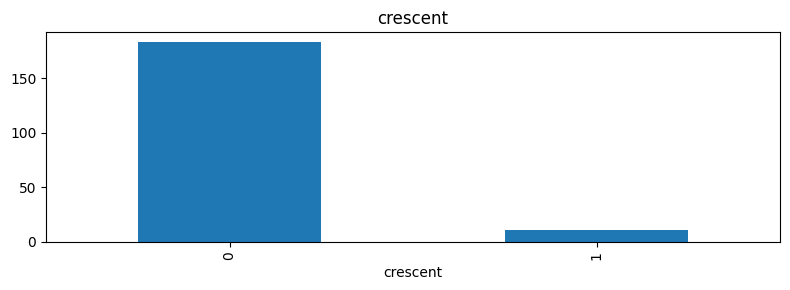


triangle
0    167
1     27
Name: count, dtype: int64



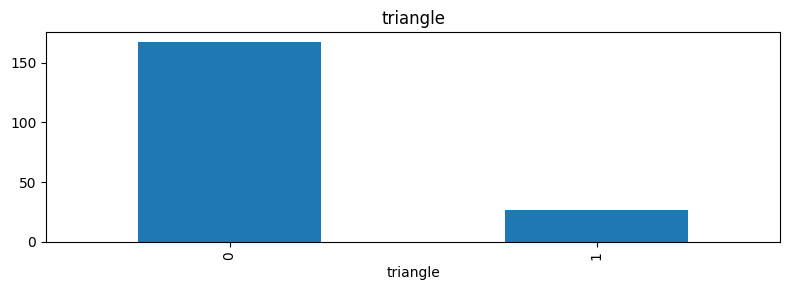


icon
0    145
1     49
Name: count, dtype: int64



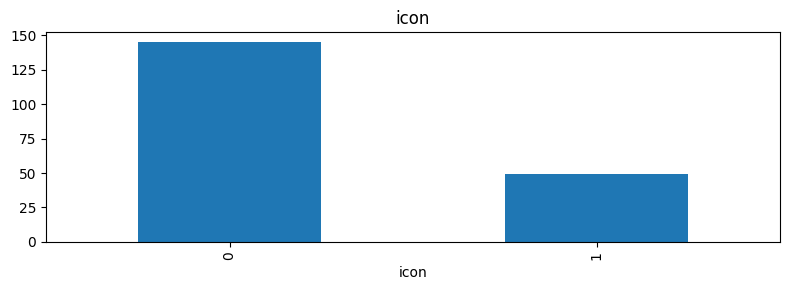


animate
0    155
1     39
Name: count, dtype: int64



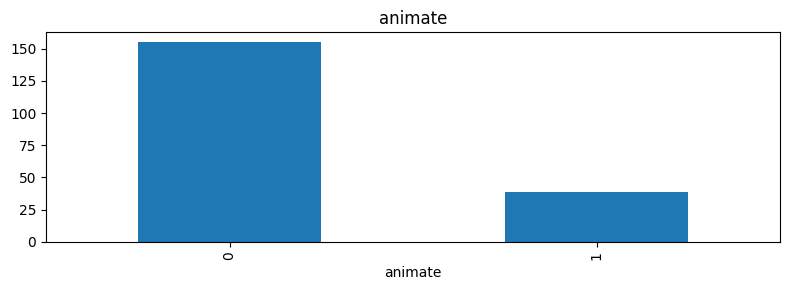


text
0    178
1     16
Name: count, dtype: int64



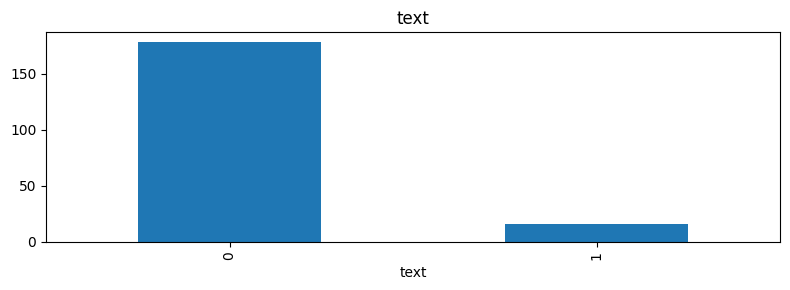


topleft
red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: count, dtype: int64



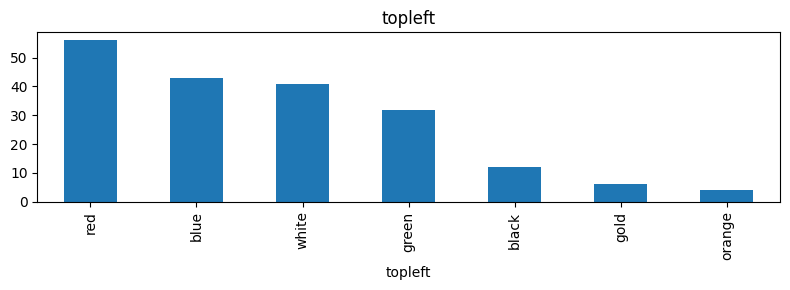


botright
red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: count, dtype: int64



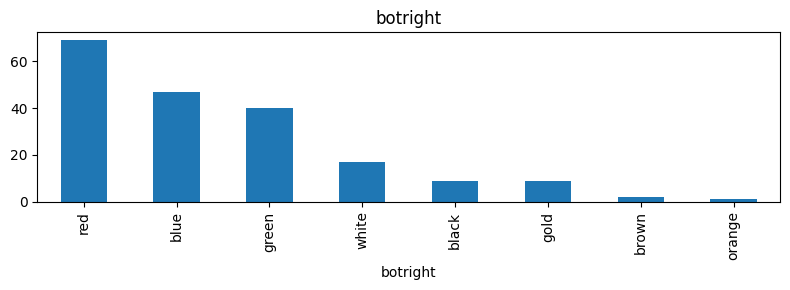

In [35]:
# Frekvencije i stupčasti grafikoni za kategoričke varijable
for col in kategorickeVarijable:
    counts = df[col].value_counts()
    print(f"\n{counts}\n")
    counts.plot(kind='bar', title=col, figsize=(8, 3))
    plt.tight_layout()
    plt.show()


- Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu


animate
0    155
1     39
Name: count, dtype: int64



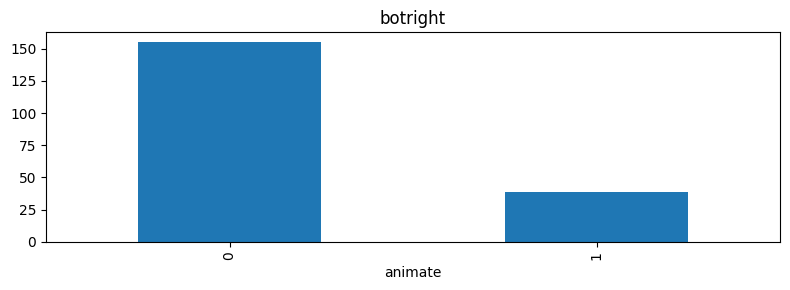

In [36]:
# Frekvencija i stupčasti grafikon za ciljnu varijablu animate
counts = df["animate"].value_counts()
print(f"\n{counts}\n")
counts.plot(kind='bar', title=col, figsize=(8, 3))
plt.tight_layout()
plt.show()
# WIP

- Objasniti / komentirati nalaze
WIP

# 2. Statističke analize uzorka podataka

- Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu

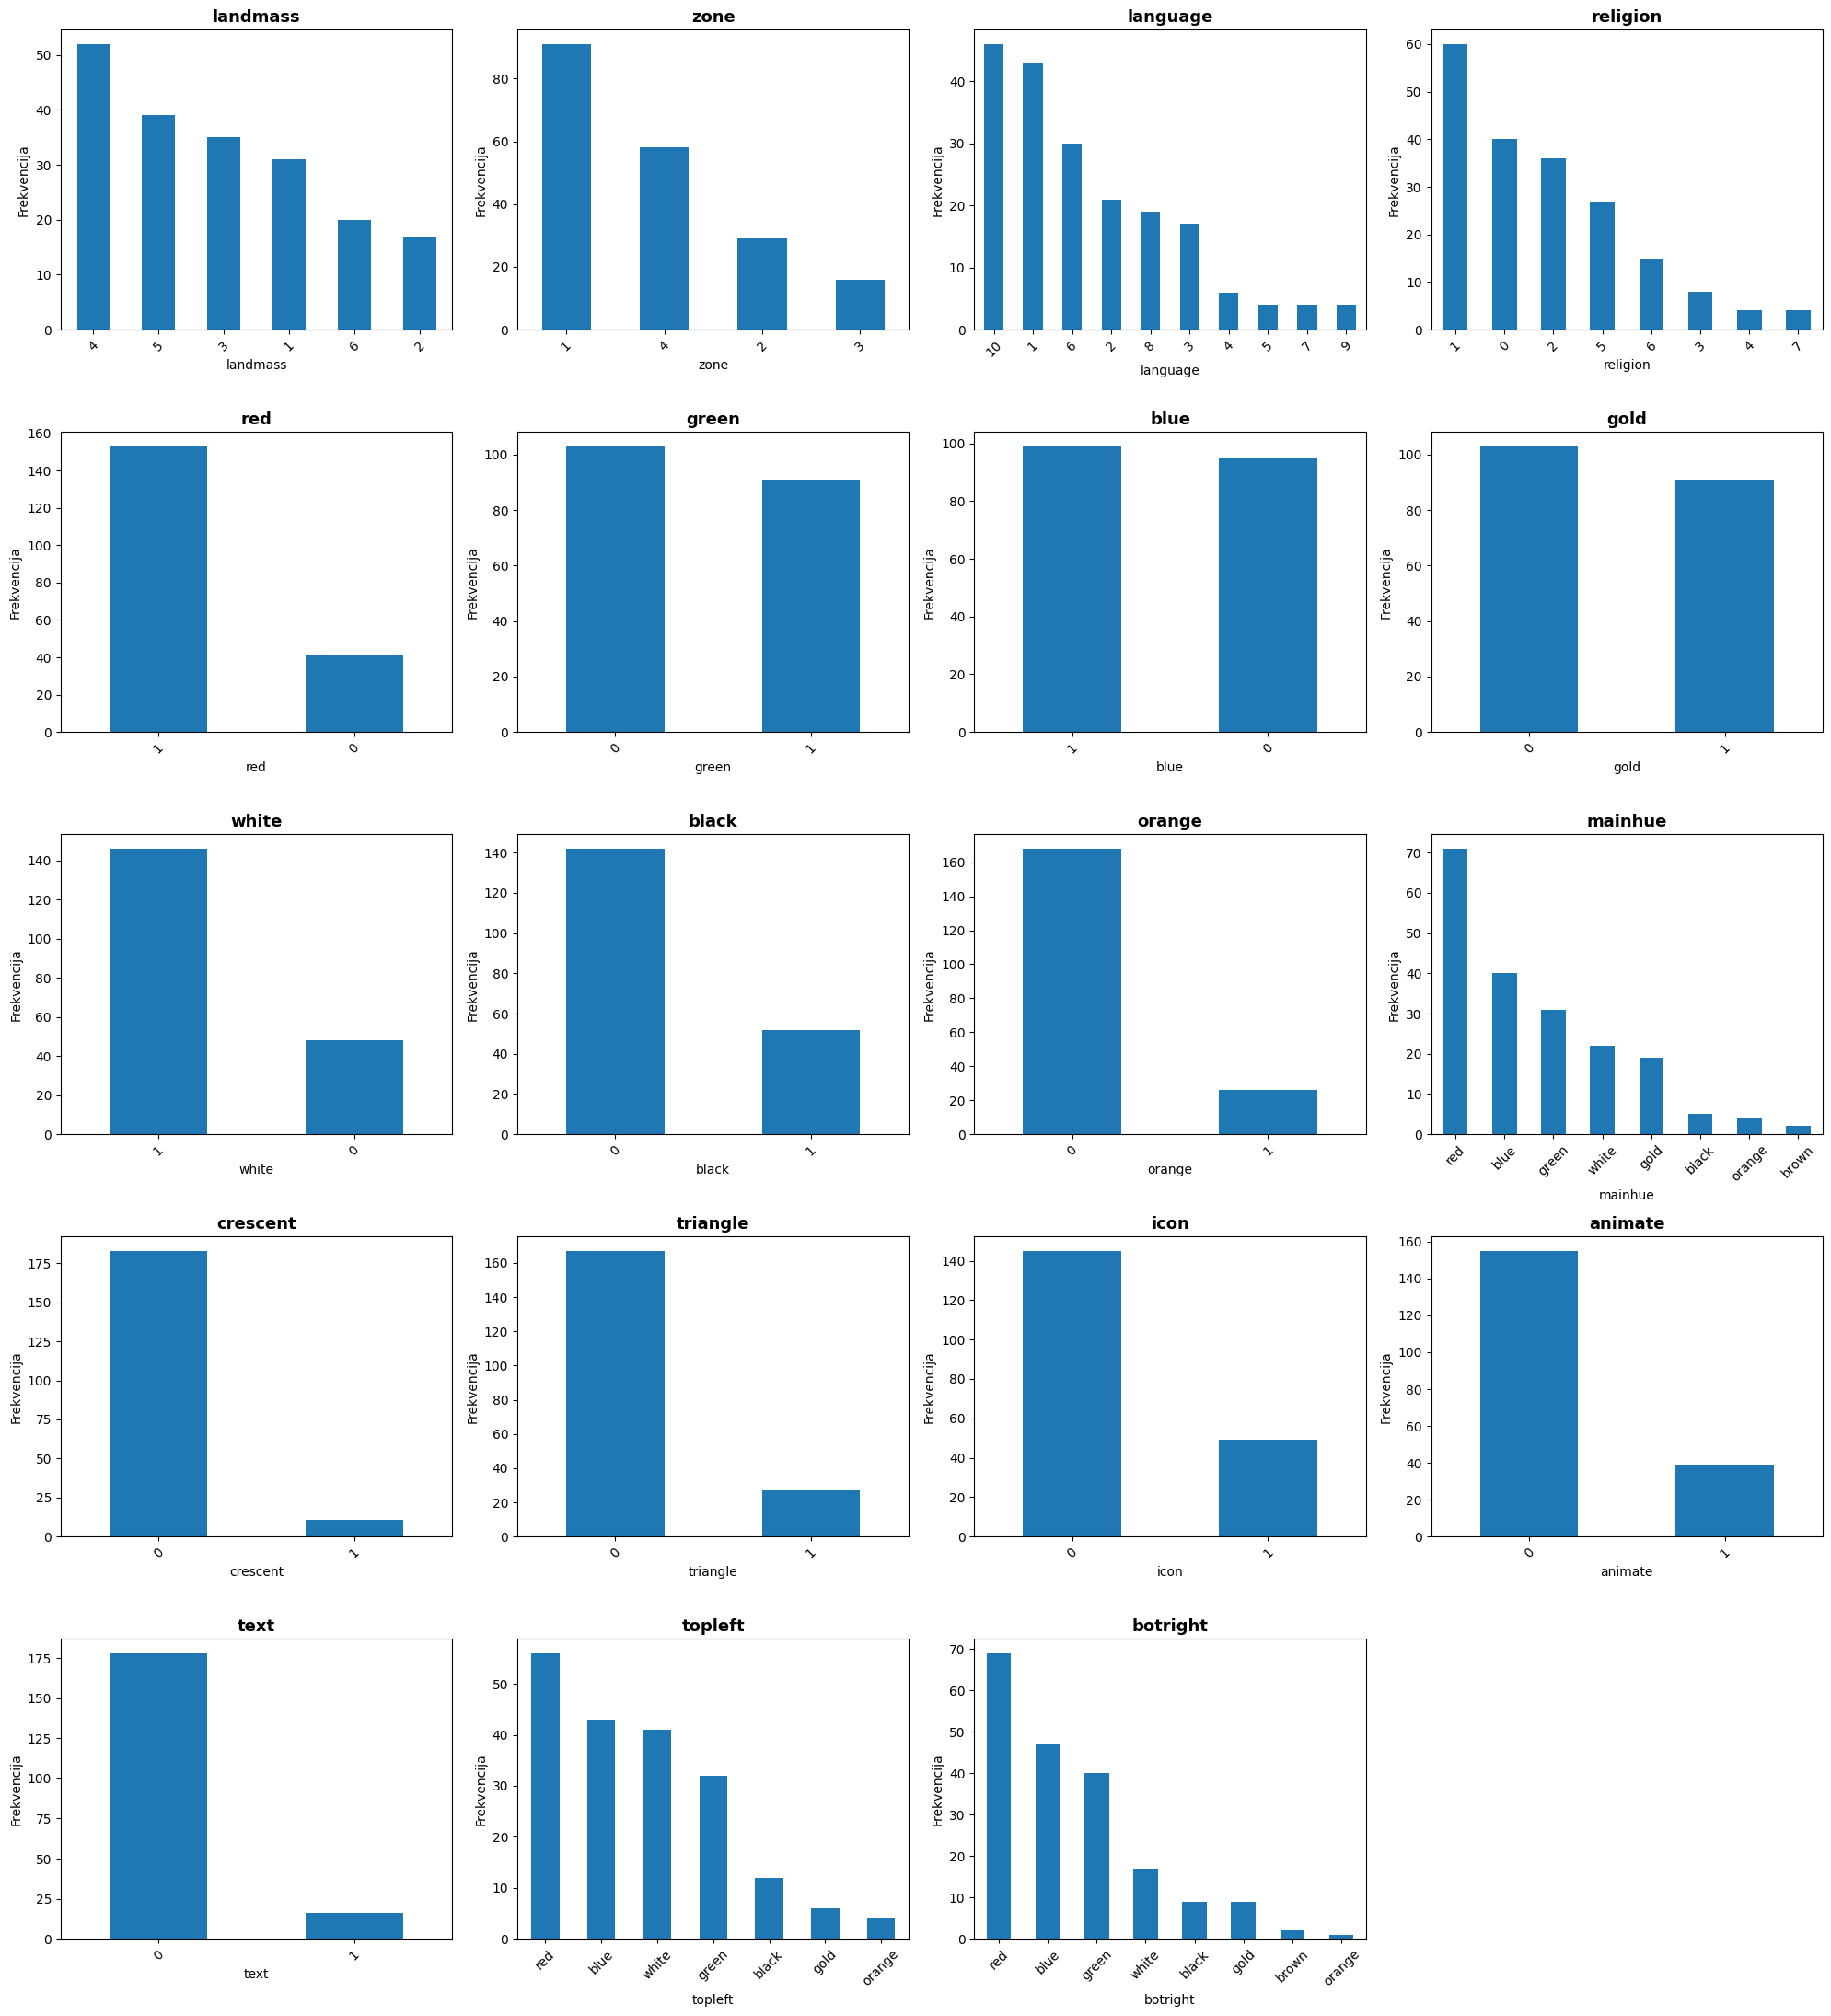

In [38]:
fig, axes = plt.subplots(5, 4, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(kategorickeVarijable):
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col, fontsize=13, fontweight='bold')
    axes[i].set_ylabel('Frekvencija')
    axes[i].tick_params(axis='x', rotation=45)

# Sakrij prazan subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

- Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

In [ ]:
df_kont = df[kontinuiraneVarijable]

# Srednja vrijednost, nagnutost (skewness), zaobljenost (kurtosis)
statistike = pd.DataFrame({
    'Srednja vrijednost': df_kont.mean(),
    'Nagnutost (skewness)': df_kont.skew(),
    'Zaobljenost (kurtosis)': df_kont.kurtosis()
})

print(statistike.to_string())

# Z vrijednosti
z_scores = pd.DataFrame(stats.zscore(df_kont), columns=kontinuiraneVarijable, index=df.index)
print("\nZ vrijednosti (prvih 10 redova):")
z_scores.head(10)

            Srednja vrijednost  Nagnutost (skewness)  Zaobljenost (kurtosis)
area                700.046392              6.758367               56.454881
population           23.268041              8.569580               82.048208
bars                  0.453608              2.117213                3.194621
stripes               1.551546              2.315282                7.717630
colours               3.463918              1.087603                1.087557
circles               0.170103              4.055628               24.769352
crosses               0.149485              2.515006                5.825494
saltires              0.092784              2.829064                6.066037
quarters              0.149485              4.546618               31.458751
sunstars              1.386598              8.006025               80.506685

Z vrijednosti (prvih 10 redova):


,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,-0.024036,-0.079262,-0.437990,0.623796,1.184519,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
1,-0.309906,-0.221033,-0.437990,-0.668195,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
2,0.779538,-0.035640,1.493147,-0.668195,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
3,-0.323298,-0.253750,-0.437990,-0.668195,1.184519,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
4,-0.323298,-0.253750,2.458716,-0.668195,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
5,0.252596,-0.177411,-0.437990,0.193133,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
6,-0.323298,-0.253750,-0.437990,-0.237531,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
7,-0.323298,-0.253750,-0.437990,-0.237531,1.184519,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
8,0.959188,0.051604,-0.437990,0.623796,-1.128870,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
9,0.959188,0.051604,-0.437990,0.623796,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
